In [90]:
import pandas as pd 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import math
import time
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
data = pd.read_csv("Results_with_drugs.csv", index_col=0)
data['creation_date'] = pd.to_datetime(data['creation_date'])
diagnosis = 'fibrillation'

C:\Users\Miron\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (9,10,11,12,13,16,17,19,22,23,24,25,28,29,31,32,33,34,35,37,38,39,40,41,42,43,44,45,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_1 = data['patient_id'].value_counts()

In [7]:
# IDs людей у которых больше одной эпикризы
data_2 = (data_1[data_1.values > 1])

In [11]:
list_of_inds_more_1 = list(data_2.index)

In [13]:
data_without_1 = data[data['patient_id'].isin(list_of_inds_more_1)]

In [16]:
data_without_1_with_diag = data_without_1[data_without_1[diagnosis]==True]
# data_without_1_without_fibr = data_without_1[data_without_1[diagnosis]==False]
data_without_1_without_diag = data_without_1[data_without_1[diagnosis].isin([False, np.nan])]

Число эпикриз с диагнозом 

In [17]:
len(data_without_1_with_diag)

20580

Число эпикриз без диагноза

In [18]:
len(data_without_1_without_diag)

144668

In [19]:
dw1wf = data_without_1_with_diag['patient_id'].value_counts()

Число пациентов с данным диагнозом, пришедших более одного раза  

In [20]:
len(dw1wf)

13197

In [21]:
dw1withoutf = data_without_1_without_diag['patient_id'].value_counts()

Число пациентов без данного диагноза, пришедших более одного раза

In [22]:
# wrong
len(dw1withoutf)

54803

In [23]:
# right
len(list_of_inds_more_1) - len(dw1wf)

41610

In [26]:
array = []
# alalala = [patients_with_0_and_1[2]]
from tqdm import tqdm
for i in tqdm(dw1wf.index):
    data_small = data[data['patient_id']==i].loc[:,[diagnosis,'creation_date']].sort_values(by=['creation_date'])
    if data_small[diagnosis].iloc[-1] != True or np.sum(data_small[diagnosis]) > 1:
        array.append(i)

100%|███████████████████████████████████████████████████████████████████████████| 13197/13197 [00:23<00:00, 555.41it/s]


In [29]:
abab = data[data['patient_id']==308920].loc[:,[diagnosis,'creation_date']]
abab.sort_values(by=['creation_date'])

,fibrillation,creation_date
89302,False,2013-02-20
88815,False,2013-02-21
89303,False,2013-02-21
97730,False,2013-02-21
82884,False,2017-08-07
72506,False,2017-08-17
40607,False,2018-02-09
22159,False,2018-02-16
40448,False,2018-04-02
31491,False,2018-04-18


In [30]:
interesting_data = data[data['patient_id'].isin(array)]

In [31]:
with_stroke = interesting_data[interesting_data['stroke']==True]
has_false_stroke = interesting_data[interesting_data['stroke']==False]

In [35]:
patients_with_stroke = with_stroke['patient_id'].value_counts()

In [36]:
patients_id_with_stroke = with_stroke['patient_id'].value_counts().index
patients_id_without_stroke = has_false_stroke['patient_id'].value_counts().index

In [39]:
abab = data[data['patient_id']==341128].loc[:,['stroke','fibrillation','creation_date']]
abab.sort_values(by=['creation_date'])

,stroke,fibrillation,creation_date
19293,NaN,False,2015-03-13
10959,True,True,2015-03-18
47385,NaN,False,2019-01-10
44548,True,True,2019-01-21


In [40]:
first_filter = interesting_data[interesting_data['fibrillation']==True]

In [42]:
second_filter = first_filter[first_filter['stroke']==False]

In [44]:
second_filter.loc[:,['stroke','fibrillation','creation_date']]

,stroke,fibrillation,creation_date
4,False,True,2015-02-28
9,False,True,2015-02-12
10,False,True,2015-01-12
14,False,True,2015-02-13
15,False,True,2015-01-12
...,...,...,...
155212,False,True,2014-12-17
155215,False,True,2014-04-24
155221,False,True,2014-05-26
155222,False,True,2014-02-28


In [45]:
# second_filter['patient_id'].value_counts()

In [46]:
# first_filter[first_filter['stroke']==True]

In [47]:
array2 = list(second_filter['patient_id'].value_counts().index)

In [49]:
c = list(set(patients_id_with_stroke) & set(array2))
d = list(set(patients_id_without_stroke) - set(patients_id_with_stroke))
print(c)
print(len(d))

[37904, 327184, 319507, 98835, 318998, 19992, 19485, 24613, 87599, 349232, 14385, 79410, 27187, 369717, 40502, 315447, 370231, 402494, 310338, 388677, 238664, 325705, 92234, 13900, 103501, 322126, 16977, 103505, 21590, 372313, 78428, 342109, 179804, 18013, 377957, 192103, 358510, 323695, 124014, 317039, 195186, 319603, 33396, 396402, 389245, 352385, 17538, 324227, 361092, 340622, 227471, 19086, 378007, 91287, 264347, 335515, 312478, 128168, 332971, 30381, 370863, 51889, 352434, 105138, 382643, 323251, 380099, 112836, 272582, 51911, 189126, 24780, 364750, 367822, 238289, 188627, 259286, 103638, 129243, 337632, 399585, 275682, 23270, 326889, 291569, 323315, 78068, 34037, 332035, 42755, 340743, 376072, 18699, 376077, 103701, 385814, 345878, 352031, 316200, 114472, 323368, 14637, 348461, 92462, 240942, 358189, 30513, 56119, 222522, 190266, 372539, 329021, 320830, 267586, 81220, 352583, 332615, 190283, 15186, 309075, 325461, 22871, 379738, 191329, 372072, 71530, 394104, 178043, 382333, 3480

In [50]:
len(c)

177

In [51]:
interesting_data_WOW = data[data['patient_id'].isin(c)]
interesting_data_WOW_d_false = data[data['patient_id'].isin(d)]

In [52]:
len(interesting_data_WOW)
len(interesting_data_WOW_d_false)

21413

In [53]:
interesting_data_WOW

,id,doc_id,case_history_id,creation_date,update_date,doc_type,sex_given,patient_id,updated_link,PAD,Sin,Sin_date,PI48,sex,age,cad,hyp,mass_index,heart_failure,diabetes,tromb,VD,stroke,TIA_1,systTR,fibrillation,atherosclerosis,left_heart,aspirin,aspirin_dose,clopidogrel,clopidogrel_dose,ara2,ara2_dose,ticagrelorum,ticagrelorum_dose,diuretic,diuretic_dose,rivaroxabanum,rivaroxabanum_dose,apixabanum,apixabanum_dose,war,war_dose,dabigatrani,dabigatrani_dose,acenocoumarolum,acenocoumarolum_dose,prasugrelum,prasugrelum_dose
50,2348721,66500,233876,2015-01-23,1.23.2015,DISCHARGE_GENERAL_CONCLUSION_1,Мужской,342109,http://10.30.101.203:8875/#/cardio_all_ehrs/34...,False,False,NaN,False,M,56.0,2,True,29.0,False,False,0.0,False,False,False,False,True,True,"4,6",кардиомагнил,75.0,NaN,NaN,NaN,NaN,NaN,NaN,верошпирон,25,ксарелто,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2351360,66588,233947,2015-01-27,1.27.2015,DISCHARGE_GENERAL_CONCLUSION_1,Женский,325705,http://10.30.101.203:8875/#/cardio_all_ehrs/32...,True,True,None None,False,F,63.0,2,False,NaN,True,True,0.0,False,False,False,False,True,True,NaN,аспирин,NaN,NaN,NaN,NaN,NaN,NaN,NaN,фуросемид,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2345191,66370,233273,2015-01-21,1.21.2015,DISCHARGE_GENERAL_CONCLUSION_1,Женский,129022,http://10.30.101.203:8875/#/cardio_all_ehrs/12...,False,True,None None,True,F,82.0,False,True,28.0,False,False,0.0,False,False,False,False,True,False,"3,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,апиксабан,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,2346978,66433,233477,2015-01-22,1.23.2015,DISCHARGE_GENERAL_CONCLUSION_1,Женский,272582,http://10.30.101.203:8875/#/cardio_all_ehrs/26...,True,False,NaN,False,F,69.0,False,True,34.0,False,False,2.0,True,True,False,False,True,True,"4,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,торасемид,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,2346074,66393,233207,2015-01-21,1.27.2015,DISCHARGE_GENERAL_CONCLUSION_1,Женский,340393,http://10.30.101.203:8875/#/cardio_all_ehrs/33...,True,False,NaN,False,F,67.0,2,True,33.0,False,False,2.0,False,True,False,False,True,True,"4,2",NaN,NaN,NaN,NaN,лозартан,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164994,2195715,0,223158,2014-08-13,8.14.2014,CARDIOLOGY_EXAMINATION,Мужской,335515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165010,2021068,0,210776,2014-02-07,2.7.2014,CARDIOLOGY_EXAMINATION,Женский,327184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165251,2325862,0,232597,2014-12-17,12.17.2014,CARDIOLOGY_EXAMINATION,Женский,340743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165438,2145928,0,219725,2014-06-09,6.9.2014,CARDIOLOGY_EXAMINATION,Женский,327184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
array_of_patients = []

for i in tqdm(c):
#     array_of_patients.append((data[data['patient_id']==i].loc[:,['stroke','fibrillation','creation_date']].sort_values(by=['creation_date'])))
    array_of_patients.append((data[data['patient_id']==i].sort_values(by=['creation_date'])))

100%|███████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 641.60it/s]


In [55]:
false_array_of_patients = []

for i in tqdm(d):
#     array_of_patients.append((data[data['patient_id']==i].loc[:,['stroke','fibrillation','creation_date']].sort_values(by=['creation_date'])))
    false_array_of_patients.append((data[data['patient_id']==i].sort_values(by=['creation_date'])))

100%|█████████████████████████████████████████████████████████████████████████████| 3923/3923 [00:05<00:00, 707.18it/s]


In [56]:
false_array_of_patients[0].loc[:,['stroke','fibrillation','creation_date']]

,stroke,fibrillation,creation_date
21074,NaN,False,2015-02-25
1391,False,True,2015-03-12
18755,NaN,False,2015-09-21
8308,False,True,2015-10-06
80417,NaN,False,2017-02-28
67023,False,True,2017-03-20
83596,NaN,False,2017-09-12
73599,False,True,2017-09-14
39265,NaN,False,2018-08-13
32385,False,True,2018-08-27


In [57]:
array_of_patients[0]

,id,doc_id,case_history_id,creation_date,update_date,doc_type,sex_given,patient_id,updated_link,PAD,Sin,Sin_date,PI48,sex,age,cad,hyp,mass_index,heart_failure,diabetes,tromb,VD,stroke,TIA_1,systTR,fibrillation,atherosclerosis,left_heart,aspirin,aspirin_dose,clopidogrel,clopidogrel_dose,ara2,ara2_dose,ticagrelorum,ticagrelorum_dose,diuretic,diuretic_dose,rivaroxabanum,rivaroxabanum_dose,apixabanum,apixabanum_dose,war,war_dose,dabigatrani,dabigatrani_dose,acenocoumarolum,acenocoumarolum_dose,prasugrelum,prasugrelum_dose
118460,1525078,0,178495,2012-09-03,9.4.2012,CARDIOLOGY_EXAMINATION,Женский,37904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113301,1534142,39368,178495,2012-09-10,9.11.2012,DISCHARGE_GENERAL_CONCLUSION_1,Женский,37904,http://10.30.101.203:8875/#/cardio_all_ehrs/29...,True,True,None,True,NaN,60.0,False,True,38.0,False,False,0.0,False,False,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,арифон,NaN,NaN,NaN,NaN,NaN,NaN,NaN,прадакса,110.0,NaN,NaN,NaN,NaN
161030,2297651,0,230413,2014-11-28,12.8.2014,CARDIOLOGY_EXAMINATION,Женский,37904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154304,2304592,64510,230413,2014-12-03,12.5.2014,DISCHARGE_GENERAL_CONCLUSION_1,Женский,37904,http://10.30.101.203:8875/#/cardio_all_ehrs/29...,True,True,None,False,M,62.0,2,True,38.0,False,False,0.0,False,False,False,False,True,True,"4,1",NaN,NaN,NaN,NaN,лозартан,NaN,NaN,NaN,гидрохлортиазид,NaN,NaN,NaN,NaN,NaN,NaN,NaN,прадакса,NaN,NaN,NaN,NaN,NaN
38126,3888307,0,335033,2018-09-18,9.29.2018,CARDIOLOGY_EXAMINATION,Женский,37904,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25662,3902093,114692,335033,2018-09-28,9.28.2018,DISCHARGE_GENERAL_CONCLUSION_1,Женский,37904,http://10.30.101.203:8875/#/cardio_all_ehrs/29...,False,False,NaN,False,F,66.0,False,True,35.0,False,False,2.0,False,True,False,False,True,False,"4,0",NaN,NaN,NaN,NaN,лозартан,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,дабигатран,NaN,NaN,NaN,NaN,NaN


In [58]:
# убираем все ненужные эпикризы, оставляя только False-True и True-True 
i = 0
for current_array in tqdm(array_of_patients):
    array_of_patients[i] = current_array[current_array.stroke.isin([True,False])]
    i+=1

100%|██████████████████████████████████████████████████████████████████████████████| 177/177 [00:00<00:00, 1280.95it/s]


In [59]:
i = 0
for current_array in tqdm(false_array_of_patients):
    false_array_of_patients[i] = current_array[current_array.stroke.isin([True,False])]
    i+=1

100%|████████████████████████████████████████████████████████████████████████████| 3923/3923 [00:02<00:00, 1334.59it/s]


In [316]:
# for current_array in array_of_patients:
#     print(current_array)

In [61]:
new_array = []
for current_array in array_of_patients:
    df_patient = pd.DataFrame()
    i = 0
    for index, row in current_array.iterrows():
#         print(type(row))
#         print(row)
#         print(current_array.loc[index].to_frame())
#         a = current_array.loc[index].to_frame()
#         df_patient.append(current_array.loc[index].to_frame().T)
        
#         print(df_patient)
        df_patient = pd.concat([df_patient, current_array.loc[index].to_frame().T], ignore_index=False)
        i+=1
#         print(current_array.loc[index].to_frame().T)
#         print(df_patient)
        if row['stroke']==True:
            break
#         break
    
    
    if (len(df_patient))>1:
        df_patient['differ'] = pd.to_timedelta(df_patient['creation_date'], unit='ns').dt.total_seconds().astype(int)
        df_patient['y'] = 1
        for index, row in df_patient.iterrows():
            df_patient.loc[index,'differ'] = df_patient.iloc[-1].loc['differ'] - df_patient.loc[index,'differ']
        new_array.append(df_patient)
    
#     break

C:\Users\Miron\Anaconda3\lib\site-packages\pandas\util\_decorators.py:208: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


In [62]:
new_array_false = []
for current_array in false_array_of_patients:
    current_array['differ'] = 242611201
    current_array['y'] = 0
    new_array_false.append(current_array)

In [63]:
new_array[0]["differ"]

113301    190857600
154304    120528000
25662             0
Name: differ, dtype: int32

In [92]:
concatinate_array = pd.concat(new_array)

In [95]:
i = 0
new_new_array = []
for current_array in tqdm(new_array):
    new_new_array.append(current_array[current_array.stroke.isin([False])])
    i+=1

100%|██████████████████████████████████████████████████████████████████████████████| 134/134 [00:00<00:00, 1975.50it/s]


In [96]:
len(new_new_array)

134

In [266]:
concatinate_array = pd.concat(new_new_array)

In [267]:
print(len(concatinate_array))
print(concatinate_array.left_heart.isna().sum())

240
109


In [268]:
concatinate_array.columns

Index(['id', 'doc_id', 'case_history_id', 'creation_date', 'update_date', 'doc_type', 'sex_given', 'patient_id', 'updated_link', 'PAD', 'Sin', 'Sin_date', 'PI48', 'sex', 'age', 'cad', 'hyp', 'mass_index', 'heart_failure', 'diabetes', 'tromb', 'VD', 'stroke', 'TIA_1', 'systTR', 'fibrillation', 'atherosclerosis', 'left_heart', 'aspirin', 'aspirin_dose', 'clopidogrel', 'clopidogrel_dose', 'ara2', 'ara2_dose', 'ticagrelorum', 'ticagrelorum_dose', 'diuretic', 'diuretic_dose', 'rivaroxabanum', 'rivaroxabanum_dose', 'apixabanum', 'apixabanum_dose', 'war', 'war_dose', 'dabigatrani', 'dabigatrani_dose', 'acenocoumarolum', 'acenocoumarolum_dose', 'prasugrelum', 'prasugrelum_dose', 'differ', 'y'], dtype='object')

In [269]:

concatinate_array = concatinate_array.drop(['id','doc_id','case_history_id', 'creation_date','update_date','doc_type','sex_given', 'patient_id', 'stroke', 'fibrillation', 'updated_link','Sin_date'], 1)

In [270]:
concatinate_array = concatinate_array.drop(['aspirin', 'clopidogrel', 'ara2', 'ticagrelorum', 'ticagrelorum', 'diuretic', 'rivaroxabanum', 'apixabanum', 'war', 'dabigatrani', 'acenocoumarolum', 'prasugrelum'], 1)

In [271]:
concatinate_array = concatinate_array.drop(['aspirin_dose', 'clopidogrel_dose', 'ara2_dose', 'ticagrelorum_dose', 'ticagrelorum_dose', 'diuretic_dose', 'rivaroxabanum_dose', 'apixabanum_dose', 'war_dose', 'dabigatrani_dose', 'acenocoumarolum_dose', 'prasugrelum_dose'], 1)

In [272]:
# concatinate_array.left_heart = concatinate_array.left_heart.replace(np.nan,0)
concatinate_array

,PAD,Sin,PI48,sex,age,cad,hyp,mass_index,heart_failure,diabetes,tromb,VD,TIA_1,systTR,atherosclerosis,left_heart,differ,y
113301,True,True,True,NaN,60,False,True,38,False,False,0,False,False,False,True,NaN,190857600,1
154304,True,True,False,M,62,2,True,38,False,False,0,False,False,False,True,"4,1",120528000,1
145607,False,False,True,F,65,False,True,31,False,False,0,False,False,False,False,"4,1",4492800,1
94150,True,False,False,F,62,False,True,22,True,False,0,False,False,False,False,"4,2",70848000,1
107127,True,False,False,M,77,2,True,27,False,False,0,True,False,False,True,NaN,136339200,1
93270,True,True,False,F,66,False,True,38,True,True,0,False,False,False,True,NaN,33868800,1
52396,True,True,False,M,82,2,True,25,False,False,0,False,False,False,True,NaN,104976000,1
95101,True,NaN,False,M,84,2,True,25,False,False,0,False,False,False,True,NaN,35164800,1
95969,True,NaN,False,M,84,2,True,25,False,False,0,False,False,False,True,NaN,35164800,1
48986,True,True,True,M,56,2,True,NaN,False,True,0,False,False,False,True,NaN,19785600,1


In [273]:
label_encoder = LabelEncoder()
concatinate_array = concatinate_array.drop('left_heart', 1)
concatinate_array = concatinate_array.dropna()
print(len(concatinate_array))
concatinate_array.sex = label_encoder.fit_transform(concatinate_array.sex)
concatinate_array.PAD = label_encoder.fit_transform(concatinate_array.PAD)
concatinate_array.Sin = label_encoder.fit_transform(concatinate_array.Sin)
concatinate_array.PI48 = label_encoder.fit_transform(concatinate_array.PI48)
concatinate_array.cad = label_encoder.fit_transform(concatinate_array.cad)
concatinate_array.hyp = label_encoder.fit_transform(concatinate_array.hyp)
concatinate_array.heart_failure = label_encoder.fit_transform(concatinate_array.heart_failure)
concatinate_array.diabetes = label_encoder.fit_transform(concatinate_array.diabetes)
concatinate_array.tromb = label_encoder.fit_transform(concatinate_array.tromb)
concatinate_array.VD = label_encoder.fit_transform(concatinate_array.VD)
concatinate_array.TIA_1 = label_encoder.fit_transform(concatinate_array.TIA_1)
concatinate_array.systTR = label_encoder.fit_transform(concatinate_array.systTR)
concatinate_array.atherosclerosis = label_encoder.fit_transform(concatinate_array.atherosclerosis)
# concatinate_array = concatinate_array.replace('M', 1)
# concatinate_array = concatinate_array.replace('F', 0)
# concatinate_array = concatinate_array.replace(True, 1)
# concatinate_array = concatinate_array.replace(False, 0)

# concatinate_array = concatinate_array.replace('False', 0)
# concatinate_array.cad = concatinate_array.cad.replace('2', 1)
# try:
#     concatinate_array.left_heart = concatinate_array.loc[:,'left_heart'].str.replace(',', '.').astype(float)
# except:
#     pass
# concatinate_array.left_heart = concatinate_array.left_heart.astype(float)


155


In [171]:
# concatinate_array

In [172]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [173]:
data_without_imputating = concatinate_array.dropna()
data_without_imputating = data_without_imputating.drop('y',1)

In [176]:

X = data_without_imputating.drop('differ',1)
y = data_without_imputating['differ']
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt' ), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          LogisticRegression() # логистическая регрессия
          ]
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.4)
sc = StandardScaler()
sc.fit(Xtrn)
Xtrn = sc.transform(Xtrn)
Xtest = sc.transform(Xtest)
#создаем временные структуры
TestModels = pd.DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
        #обучаем модель
    model.fit(Xtrn, Ytrn) 
        #вычисляем коэффициент детерминации
    tmp['R2_Y'] = r2_score(Ytest, model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [179]:
model_logreg = LogisticRegression()
model.fit(Xtrn, Ytrn)
pred = model.predict(Xtest)
print(r2_score(Ytest, pred))

C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9999999437275463


In [180]:
print(list(Ytest[:10]))
print(list(pred[:10]))


[132105600, 57542400, 6739200, 40262400, 17625600, 99792000, 12700800, 86659200, 8640000, 15120000]
[9763200, 96681600, 154137600, 3283200, 52876800, 5788800, 22896000, 6134400, 32745600, 104976000]


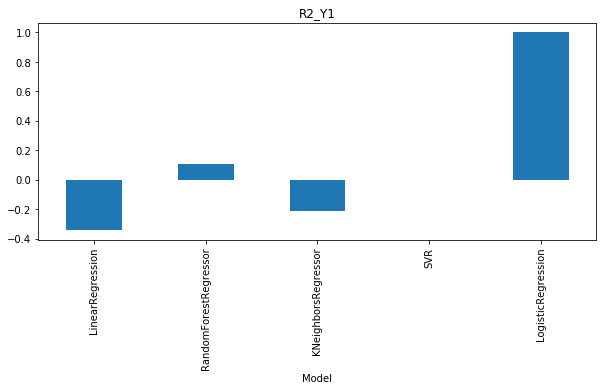

In [181]:
fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestModels.R2_Y.plot(ax=axes, kind='bar', title='R2_Y1')

In [182]:
# # без left_heart 
# concatinate_array_new = concatinate_array.drop('left_heart', 1)
# data_without_imputating = concatinate_array_new.dropna()


In [183]:
# data_without_imputating

In [184]:
# data_without_imputating = data_without_imputating.drop('y',1)
# X = data_without_imputating.drop('differ',1)
# y = data_without_imputating['differ']
# models = [LinearRegression(), # метод наименьших квадратов
#           RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
#           KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
#           SVR(kernel='linear'), # метод опорных векторов с линейным ядром
#           LogisticRegression() # логистическая регрессия
#           ]
# Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.3)
# #создаем временные структуры
# TestModels = pd.DataFrame()
# tmp = {}
# #для каждой модели из списка
# for model in models:
#     #получаем имя модели
#     m = str(model)
#     tmp['Model'] = m[:m.index('(')]    
#     #для каждого столбцам результирующего набора
#         #обучаем модель
#     model.fit(Xtrn, Ytrn) 
#         #вычисляем коэффициент детерминации
#     tmp['R2_Y'] = r2_score(Ytest, model.predict(Xtest))
#     #записываем данные и итоговый DataFrame
#     TestModels = TestModels.append([tmp])
# #делаем индекс по названию модели
# TestModels.set_index('Model', inplace=True)
# fig, axes = plt.subplots(ncols=1, figsize=(10,4))
# TestModels.R2_Y.plot(ax=axes, kind='bar', title='R2_Y1')

In [185]:
# пробуем добавить отрицательные моменты

In [274]:
len(new_array_false)

3923

In [198]:
concatinate_array = pd.concat(new_new_array + new_array_false)
concatinate_array = concatinate_array.drop(['id','doc_id','case_history_id', 'creation_date','update_date','doc_type','sex_given', 'patient_id', 'stroke', 'fibrillation', 'updated_link','Sin_date'], 1)
concatinate_array = concatinate_array.drop(['aspirin', 'clopidogrel', 'ara2', 'ticagrelorum', 'ticagrelorum', 'diuretic', 'rivaroxabanum', 'apixabanum', 'war', 'dabigatrani', 'acenocoumarolum', 'prasugrelum'], 1)
concatinate_array = concatinate_array.drop(['aspirin_dose', 'clopidogrel_dose', 'ara2_dose', 'ticagrelorum_dose', 'ticagrelorum_dose', 'diuretic_dose', 'rivaroxabanum_dose', 'apixabanum_dose', 'war_dose', 'dabigatrani_dose', 'acenocoumarolum_dose', 'prasugrelum_dose'], 1)
label_encoder = LabelEncoder()
concatinate_array = concatinate_array.drop('left_heart', 1)
concatinate_array = concatinate_array.dropna()
concatinate_array.sex = label_encoder.fit_transform(concatinate_array.sex)
concatinate_array.y = label_encoder.fit_transform(concatinate_array.y)
concatinate_array.PAD = label_encoder.fit_transform(concatinate_array.PAD)
concatinate_array.Sin = label_encoder.fit_transform(concatinate_array.Sin)
concatinate_array.PI48 = label_encoder.fit_transform(concatinate_array.PI48)
concatinate_array.cad = label_encoder.fit_transform(concatinate_array.cad)
concatinate_array.hyp = label_encoder.fit_transform(concatinate_array.hyp)
concatinate_array.heart_failure = label_encoder.fit_transform(concatinate_array.heart_failure)
concatinate_array.diabetes = label_encoder.fit_transform(concatinate_array.diabetes)
concatinate_array.tromb = label_encoder.fit_transform(concatinate_array.tromb)
concatinate_array.VD = label_encoder.fit_transform(concatinate_array.VD)
concatinate_array.TIA_1 = label_encoder.fit_transform(concatinate_array.TIA_1)
concatinate_array.systTR = label_encoder.fit_transform(concatinate_array.systTR)
concatinate_array.atherosclerosis = label_encoder.fit_transform(concatinate_array.atherosclerosis)

# concatinate_array = concatinate_array.replace('M', 1)
# concatinate_array = concatinate_array.replace('F', 0)
# concatinate_array = concatinate_array.replace(True, 1)
# concatinate_array = concatinate_array.replace(False, 0)
# concatinate_array = concatinate_array.replace('False', 0)
# concatinate_array.cad = concatinate_array.cad.replace('2', 1)
# try:
#     concatinate_array.left_heart = concatinate_array.loc[:,'left_heart'].str.replace(',', '.').astype(float)
# except:
#     pass
# concatinate_array.left_heart = concatinate_array.left_heart.astype(float)
data_without_imputating = concatinate_array.dropna()
data_without_imputating = data_without_imputating.drop('y',1)

In [190]:

X = data_without_imputating.drop('differ',1)
y = data_without_imputating['differ']
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          LogisticRegression() # логистическая регрессия
          ]
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(Xtrn)
Xtrn = sc.transform(Xtrn)
Xtest = sc.transform(Xtest)
#создаем временные структуры
TestModels = pd.DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
        #обучаем модель
    model.fit(Xtrn, Ytrn) 
        #вычисляем коэффициент детерминации
    tmp['R2_Y'] = r2_score(Ytest, model.predict(Xtest))
    #записываем данные и итоговый DataFrame
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


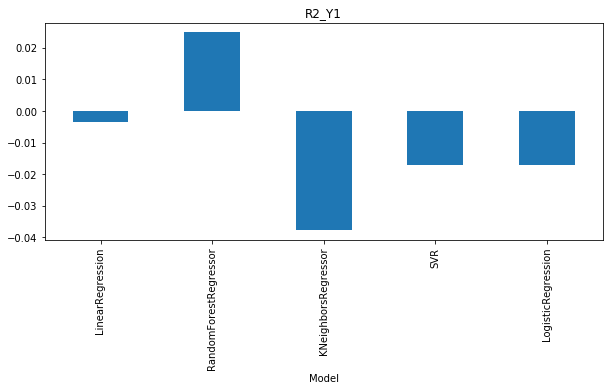

In [191]:
fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestModels.R2_Y.plot(ax=axes, kind='bar', title='R2_Y1')

In [88]:
# # без left_heart 
# concatinate_array_new = concatinate_array.drop('left_heart', 1)
# data_without_imputating = concatinate_array_new.dropna()


C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


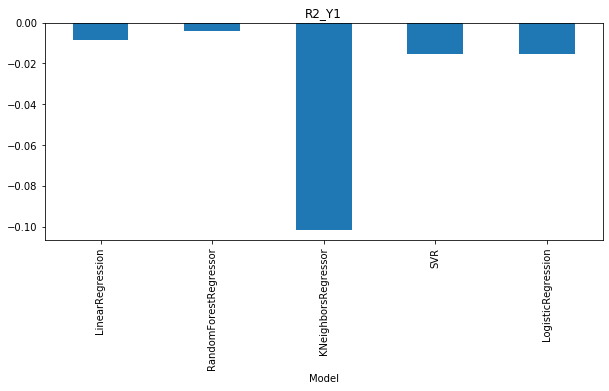

In [89]:
# data_without_imputating = data_without_imputating.drop('y',1)
# X = data_without_imputating.drop('differ',1)
# y = data_without_imputating['differ']
# models = [LinearRegression(), # метод наименьших квадратов
#           RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
#           KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
#           SVR(kernel='linear'), # метод опорных векторов с линейным ядром
#           LogisticRegression() # логистическая регрессия
#           ]
# Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.3)
# #создаем временные структуры
# TestModels = pd.DataFrame()
# tmp = {}
# #для каждой модели из списка
# for model in models:
#     #получаем имя модели
#     m = str(model)
#     tmp['Model'] = m[:m.index('(')]    
#     #для каждого столбцам результирующего набора
#         #обучаем модель
#     model.fit(Xtrn, Ytrn) 
#         #вычисляем коэффициент детерминации
#     tmp['R2_Y'] = r2_score(Ytest, model.predict(Xtest))
#     #записываем данные и итоговый DataFrame
#     TestModels = TestModels.append([tmp])
# #делаем индекс по названию модели
# TestModels.set_index('Model', inplace=True)
# fig, axes = plt.subplots(ncols=1, figsize=(10,4))
# TestModels.R2_Y.plot(ax=axes, kind='bar', title='R2_Y1')

In [209]:
# Классификатор
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [200]:
concatinate_array
concatinate_array = pd.concat(new_new_array + new_array_false)
concatinate_array = concatinate_array.drop(['id','doc_id','case_history_id', 'creation_date','update_date','doc_type','sex_given', 'patient_id', 'stroke', 'fibrillation', 'updated_link','Sin_date'], 1)
concatinate_array = concatinate_array.drop(['aspirin', 'clopidogrel', 'ara2', 'ticagrelorum', 'ticagrelorum', 'diuretic', 'rivaroxabanum', 'apixabanum', 'war', 'dabigatrani', 'acenocoumarolum', 'prasugrelum'], 1)
concatinate_array = concatinate_array.drop(['aspirin_dose', 'clopidogrel_dose', 'ara2_dose', 'ticagrelorum_dose', 'ticagrelorum_dose', 'diuretic_dose', 'rivaroxabanum_dose', 'apixabanum_dose', 'war_dose', 'dabigatrani_dose', 'acenocoumarolum_dose', 'prasugrelum_dose'], 1)
label_encoder = LabelEncoder()
concatinate_array = concatinate_array.drop('left_heart', 1)
concatinate_array = concatinate_array.dropna()
concatinate_array.sex = label_encoder.fit_transform(concatinate_array.sex)
concatinate_array.y = label_encoder.fit_transform(concatinate_array.y)
concatinate_array.PAD = label_encoder.fit_transform(concatinate_array.PAD)
concatinate_array.Sin = label_encoder.fit_transform(concatinate_array.Sin)
concatinate_array.PI48 = label_encoder.fit_transform(concatinate_array.PI48)
concatinate_array.cad = label_encoder.fit_transform(concatinate_array.cad)
concatinate_array.hyp = label_encoder.fit_transform(concatinate_array.hyp)
concatinate_array.heart_failure = label_encoder.fit_transform(concatinate_array.heart_failure)
concatinate_array.diabetes = label_encoder.fit_transform(concatinate_array.diabetes)
concatinate_array.tromb = label_encoder.fit_transform(concatinate_array.tromb)
concatinate_array.VD = label_encoder.fit_transform(concatinate_array.VD)
concatinate_array.TIA_1 = label_encoder.fit_transform(concatinate_array.TIA_1)
concatinate_array.systTR = label_encoder.fit_transform(concatinate_array.systTR)
concatinate_array.atherosclerosis = label_encoder.fit_transform(concatinate_array.atherosclerosis)

data_for_classificator = concatinate_array.drop('differ',1)

In [222]:
X = data_for_classificator.drop('y',1)
y = data_for_classificator['y']

Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
sc = StandardScaler()
sc.fit(Xtrn)
Xtrn = sc.transform(Xtrn)
Xtest = sc.transform(Xtest)

In [223]:
sum(Ytest)

31

In [224]:
lrcv = LogisticRegressionCV(Cs=[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4], cv=StratifiedKFold(n_splits=5, random_state=42), penalty='l2')
lrcv.fit(Xtrn, Ytrn)
print(lrcv.C_, lrcv.scores_)

[0.0001] {1: array([[0.97957516, 0.97957516, 0.97957516, 0.97957516, 0.97957516,
        0.97957516, 0.97957516, 0.97957516, 0.97957516],
       [0.97957516, 0.97957516, 0.97957516, 0.97875817, 0.97875817,
        0.97875817, 0.97875817, 0.97875817, 0.97875817],
       [0.97955846, 0.97955846, 0.97955846, 0.97955846, 0.97955846,
        0.97955846, 0.97955846, 0.97955846, 0.97955846],
       [0.97955846, 0.97955846, 0.97955846, 0.97955846, 0.97955846,
        0.97955846, 0.97955846, 0.97955846, 0.97955846],
       [0.98036007, 0.98036007, 0.98036007, 0.98036007, 0.98036007,
        0.98036007, 0.98036007, 0.98036007, 0.98036007]])}


In [225]:

lrcv = LogisticRegressionCV(Cs=[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4], cv=StratifiedKFold(n_splits=5, random_state=42), solver='saga', penalty='l1')
lrcv.fit(Xtrn, Ytrn)
print(lrcv.C_, lrcv.scores_)

C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

[0.0001] {1: array([[0.97957516, 0.97957516, 0.97957516, 0.97957516, 0.97957516,
        0.97957516, 0.97957516, 0.97957516, 0.97957516],
       [0.97957516, 0.97957516, 0.97957516, 0.97957516, 0.97957516,
        0.97875817, 0.97875817, 0.97875817, 0.97875817],
       [0.97955846, 0.97955846, 0.97955846, 0.97955846, 0.97955846,
        0.97955846, 0.97955846, 0.97955846, 0.97955846],
       [0.97955846, 0.97955846, 0.97955846, 0.97955846, 0.97955846,
        0.97955846, 0.97955846, 0.97955846, 0.97955846],
       [0.98036007, 0.98036007, 0.98036007, 0.98036007, 0.98036007,
        0.98036007, 0.98036007, 0.98036007, 0.98036007]])}


In [226]:
best_lr = LogisticRegression(C=0.0001, penalty='l2', solver='lbfgs', fit_intercept=False)
best_lr.fit(Xtrn, Ytrn)
y_pred = best_lr.predict(Xtest)
print(roc_auc_score(Ytest,y_pred))
print(f1_score(Ytest, y_pred))


0.4948675461060062
0.0377906976744186


In [227]:
X_train = Xtrn
y_train = Ytrn
X_test = Xtest
y_test = Ytest

In [275]:
gscv_for_xg = GridSearchCV(XGBClassifier(), param_grid={'max_depth': range(1,10), 'n_estimators': [50,100,300,500]})
gscv_for_xg.fit(X_train, y_train)

C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': [50, 100, 300, 500]},
             pre_dispatch='2*n_jobs', refit=Tru

In [276]:
gscv_for_xg.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [277]:
best_xgboost = XGBClassifier(max_depth=9, n_estimators=100)
best_xgboost.fit(X_train, y_train)
y_pred = best_xgboost.predict(X_test)
print(roc_auc_score(y_test,y_pred))
print(f1_score(y_test, y_pred))

leglah_best_xgb_f1 = f1_score(y_test, y_pred)
leglah_best_xbg_rocauc = roc_auc_score(y_test,y_pred)

0.515795476554262
0.06060606060606061


In [231]:
from sklearn.svm import SVC

In [232]:
gscv_for_svc = GridSearchCV(SVC(), param_grid={'gamma': [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4], 'C': [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]})
gscv_for_svc.fit(X_train, y_train)

C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0, 10000.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                   1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [233]:
gscv_for_svc.best_params_

{'C': 100.0, 'gamma': 0.01}

In [234]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.010, C=100.0)
svm_rbf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [235]:
print(roc_auc_score(y_test,svm_rbf.predict(X_test)))
print(f1_score(y_test, svm_rbf.predict(X_test)))


0.5161290322580645
0.0625


In [240]:
from sklearn.tree import DecisionTreeClassifier

gscv_for_tree = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': range(1,15)})
gscv_for_tree.fit(X_train, y_train)


C:\Users\Miron\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sc

In [241]:
gscv_for_tree.best_params_

{'max_depth': 1}

In [254]:

reg_tree = DecisionTreeClassifier(max_depth=25, random_state=17)

reg_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [255]:
print(roc_auc_score(y_test,reg_tree.predict(X_test)))
print(f1_score(y_test, reg_tree.predict(X_test)))


0.5706384901762466
0.1515151515151515


In [ ]:
# Сначала True, потом может быть False у фибрилляция
# проверить таймстепмы по дням на парочке пациентов
# классификатор -- по окну времени (табличка) полгода -год -два
# шкалы (корреляция) + время до инсульта(CH2) -- график 
# фибрилляция статистика (+по переиодам)
# фибрилляция (предсказание) -- классификатор (год, мб 2)



# ---------------------
# XGBregressor
# "обзвон". Написать Ольге по поводу "stroke в другую больницу". True, о которых мы не знаем.

In [305]:
fibr_data = []
from tqdm import tqdm
for i in tqdm(dw1wf.index):
    data_small = data[data['patient_id']==i].loc[:,[diagnosis,'creation_date']].sort_values(by=['creation_date'])
    if data_small[diagnosis].iloc[-1] != True or np.sum(data_small[diagnosis]) > 1:
        fibr_data.append(i)

100%|███████████████████████████████████████████████████████████████████████████| 13197/13197 [00:22<00:00, 579.85it/s]


In [306]:
# fibr_data_WOW = data[data['patient_id'].isin(dw1wf.index)]
fibr_data_WOW = []

for i in tqdm(dw1wf.index):
#     array_of_patients.append((data[data['patient_id']==i].loc[:,['stroke','fibrillation','creation_date']].sort_values(by=['creation_date'])))
    fibr_data_WOW.append((data[data['patient_id']==i].sort_values(by=['creation_date'])))

100%|███████████████████████████████████████████████████████████████████████████| 13197/13197 [00:18<00:00, 731.79it/s]


In [307]:
i = 0
for current_array in tqdm(fibr_data_WOW):
    fibr_data_WOW[i] = current_array[current_array.fibrillation.isin([True,False])]
    i+=1

100%|██████████████████████████████████████████████████████████████████████████| 13197/13197 [00:09<00:00, 1440.34it/s]


In [308]:
fibr_data_interesting = []
for current_array in tqdm(fibr_data_WOW):
#     print()
#     break
    if current_array.sort_values(by=['creation_date']).loc[:,'fibrillation'].iloc[0]==False:
        fibr_data_interesting.append(current_array)

100%|██████████████████████████████████████████████████████████████████████████| 13197/13197 [00:08<00:00, 1507.35it/s]


In [309]:
len(fibr_data_interesting)

12732

In [315]:
fibr_data_interesting[2000].loc[:,['patient_id','fibrillation','creation_date']]

,patient_id,fibrillation,creation_date
81445,383789,False,2017-06-19
70724,383789,True,2017-06-26
76989,383789,False,2017-06-28
85571,383789,False,2017-06-28
70836,383789,True,2017-06-29


In [72]:
abab = data[data['patient_id']==73879].loc[:,['stroke','creation_date', 'updated_link']]
abab.sort_values(by=['creation_date'])

,stroke,creation_date,updated_link
117647,NaN,2012-07-09,NaN
110746,True,2012-07-17,http://10.30.101.203:8875/#/cardio_all_ehrs/71...
103388,NaN,2013-04-19,NaN
90634,True,2013-04-29,http://10.30.101.203:8875/#/cardio_all_ehrs/71...
156366,NaN,2014-05-29,NaN
148478,True,2014-06-06,http://10.30.101.203:8875/#/cardio_all_ehrs/71...
162868,NaN,2014-11-10,NaN
153085,True,2014-11-20,http://10.30.101.203:8875/#/cardio_all_ehrs/71...
21107,NaN,2015-10-06,NaN
7772,True,2015-10-15,http://10.30.101.203:8875/#/cardio_all_ehrs/71...


In [73]:
pd.options.display.max_colwidth = 100

In [74]:
data[data['patient_id']==73879].updated_link

7772       http://10.30.101.203:8875/#/cardio_all_ehrs/71438-93939/73539-74000/73879_76582
21107                                                                                  NaN
24013     http://10.30.101.203:8875/#/cardio_all_ehrs/71438-93939/73539-74000/73879_107451
42317                                                                                  NaN
71821      http://10.30.101.203:8875/#/cardio_all_ehrs/71438-93939/73539-74000/73879_99168
75085     http://10.30.101.203:8875/#/cardio_all_ehrs/71438-93939/73539-74000/73879_103727
75941     http://10.30.101.203:8875/#/cardio_all_ehrs/71438-93939/73539-74000/73879_102792
78737                                                                                  NaN
81653                                                                                  NaN
86580                                                                                  NaN
90634      http://10.30.101.203:8875/#/cardio_all_ehrs/71438-93939/73539-74000/73879_46008

отказ оборудования 

In [305]:
patients_with_0_and_1 = list(set(dw1wf.index)&set(dw1withoutf.index))

In [306]:
len(patients_with_0_and_1)  

975

In [307]:
patients_with_0_and_1[2]

397317

In [308]:
data.columns

Index(['id', 'doc_id', 'case_history_id', 'creation_date', 'update_date',
       'doc_type', 'sex_given', 'patient_id', 'updated_link', 'PAD', 'Sin',
       'Sin_date', 'PI48', 'sex', 'age', 'cad', 'hyp', 'mass_index',
       'heart_failure', 'diabetes', 'tromb', 'VD', 'stroke', 'TIA_1', 'systTR',
       'fibrillation', 'atherosclerosis', 'left_heart', 'aspirin',
       'aspirin_dose', 'clopidogrel', 'clopidogrel_dose', 'ara2', 'ara2_dose',
       'ticagrelorum', 'ticagrelorum_dose', 'diuretic', 'diuretic_dose',
       'rivaroxabanum', 'rivaroxabanum_dose', 'apixabanum', 'apixabanum_dose',
       'war', 'war_dose', 'dabigatrani', 'dabigatrani_dose', 'acenocoumarolum',
       'acenocoumarolum_dose', 'prasugrelum', 'prasugrelum_dose'],
      dtype='object')

In [309]:
a = data[data['patient_id']==229383].loc[:,[diagnosis,'creation_date']]

In [310]:
a = data[data['patient_id']==229383].loc[:,[diagnosis,'creation_date']]
# a["stroke"]

In [311]:
# from datetime import  datetime 
abab = data[data['patient_id']==335879].loc[:,[diagnosis,'creation_date']]
abab['creation_date']= pd.to_datetime(abab['creation_date'])
# abab['creation_date']
# for i in range(len(abab['creation_date'])):
#     abab['creation_date'].iloc[[i]] = datetime.strptime(abab['creation_date'].iloc[[i]], '%d.%m.%y')

In [312]:
abab.sort_values(by=['creation_date'])

,TIA_1,creation_date
158361,NaN,2014-08-25
150616,False,2014-08-28


In [313]:
# type(abab['stroke'].iloc[1])

In [314]:
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [315]:
array = []
alalala = [patients_with_0_and_1[2]]
from tqdm import tqdm
for i in tqdm(patients_with_0_and_1):
    data_small = data[data['patient_id']==i].loc[:,[diagnosis,'creation_date']].sort_values(by=['creation_date'])
    if data_small[diagnosis].iloc[0] == False or math.isnan(data_small[diagnosis].iloc[0]):
        array.append(i)


100%|███████████████████████████████████████████████████████████████████████████████| 975/975 [00:04<00:00, 211.70it/s]


In [316]:
len(array)

957

In [317]:
data_small[diagnosis].iloc[0]

nan

2905 для stroke

12732 для fibrillation

957 для TIA_1